<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/89_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
%%capture
!pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pooch
from PIL import Image
from wordcloud import ImageColorGenerator, WordCloud

In [ ]:
!curl 'https://www.visualcapitalist.com/countries-by-share-of-earths-surface/' \
  -s \
  -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:133.0) Gecko/20100101 Firefox/133.0' \
  > 'countries.html'

In [ ]:
python_logo = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/refs/heads/main/files/python-logo.png',
    known_hash='c3bd1b6993e7fe24e3c9ec16adac1ce09baf30416268cec19a9851db9edab22d'
)

In [ ]:
countries_df = (
    pd.read_html('countries.html')[0]
    .rename(
        columns={
            'Country / Dependency': 'country',
            'Total in km² (mi²)': 'total',
            "Percentage of Earth's Surface": 'earth_percent',
        }
    )
    .assign(
        earth_percent=lambda df_: df_.earth_percent.str.replace('%', '').astype(float),
        total=lambda df_: df_.total.str.split('(').str[0].str.strip().str.replace(',', '').astype(float),
    )
    .rename(columns={'total': 'total_km2'})
)

In [ ]:
countries_df.sample(5, random_state=2025)

,country,total_km2,earth_percent
30,Egypt,1002450.0,0.197
0,Russia,17098246.0,3.352
32,Nigeria,923768.0,0.181
34,Pakistan,907843.0,0.178
5,Brazil,8515767.0,1.670


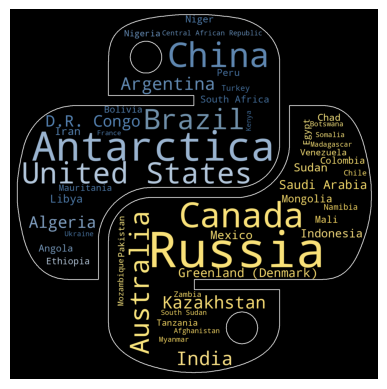

In [ ]:
mask = np.array(Image.open(python_logo))
colormap = ImageColorGenerator(mask)

wc = WordCloud(
    random_state=2025,
    mask=mask,
    background_color='black',
    contour_color='white',
    contour_width=2,
    max_words=50,
)
wc.generate_from_frequencies(dict(countries_df[['country', 'earth_percent']].values))
wc.recolor(color_func=colormap)

plt.imshow(wc)
plt.axis('off')
plt.savefig('wordcloud.png', dpi=600)